<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Great Learning / Deakin (MDS) Project Submission**
<hr>

>**Computer Vision (CV) Project 1**<br>
>*Goal : Demonstrate the ability to build a image classifier*<br>
>*Domain : Botanical Research* <br>
>*Developer : Nishant Killedar*
<br>

> **CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.
<br>

> **PROJECT OBJECTIVE**: To create a classifier capable of determining a plant's species from a photo.

<hr>

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import cv2 as cv2
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import losses
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# **Section 1 : Import and Understand the data [12 Marks]**
<hr>
<li>A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]<br>
&emsp; &emsp; <font color='gray'>Hint: You can extract it Manually by losing 2 marks.</font>
<li>B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]<br>
&emsp; &emsp; <font color='gray'>Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..</font>
<li>C. Write a function that will select n random images and display images along with its species. [4 Marks]<br>
&emsp; &emsp; <font color='gray'>Hint: If input for function is 5, it should print 5 random images along with its labels.</font>
<hr>

<hr>

**Extract plant-seedlings-classification.zip into new folder using python**

<hr>

In [ ]:
"""
with zipfile.ZipFile("/content/drive/MyDrive/datasets/glcv/addl/plant-seedlings-classification.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/datasets/glcv/addl/psc/")
"""

'\nwith zipfile.ZipFile("/content/drive/MyDrive/datasets/glcv/addl/plant-seedlings-classification.zip","r") as zip_ref:\n    zip_ref.extractall("/content/drive/MyDrive/datasets/glcv/addl/psc/")\n'

<font color='red'> <b>
It took more than 60 minutes to unzip all & this took away my compute time from Colab. Please do not include marks for just running a compute intensive command when it can be done manually - it goes into wasted compute time for not just me but 30 other folks in my batch ( more than 1800 mins ) </b> </font>

I cancelled the command after 60 mins

<hr>

**<font color='green'>Map images from train folder with train labels to form a DataFrame</font>**

<hr>

In [ ]:

dataset = '/content/drive/MyDrive/datasets/glcv/addl/psc/plant-seedlings-classification/train'
x = []
y = []
labels = []
names = []

In [ ]:
os.listdir(dataset)

['Cleavers',
 'Sugar beet',
 'Common Chickweed',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Fat Hen',
 'Common wheat',
 'Black-grass',
 'Small-flowered Cranesbill',
 'Charlock',
 'Maize',
 '.DS_Store']

In [ ]:
# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   #Specific to Mac
      labels.append(i)
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (128, 128))
        names.append(j)
        x.append(dummy)
        y.append(i)

Cleavers
Sugar beet
Common Chickweed
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize
.DS_Store


In [ ]:
len(y)

4750

In [ ]:
df = pd.DataFrame(zip(x, y, names), columns=['image', 'species', 'names' ])

In [ ]:
df.tail(5)

image species          names
4745  [[[41, 52, 64], [40, 51, 65], [35, 50, 69], [6...   Maize  b8b2658d9.png
4746  [[[81, 104, 119], [88, 111, 124], [40, 66, 86]...   Maize  edd80f8a8.png
4747  [[[140, 140, 140], [138, 138, 139], [141, 142,...   Maize  8c71f9b84.png
4748  [[[61, 79, 98], [52, 70, 91], [43, 62, 86], [4...   Maize  fb6328acb.png
4749  [[[78, 101, 119], [83, 106, 124], [80, 105, 12...   Maize  87a3254c9.png

<hr>

**<font color='green'>Write a function that will select n random images and display images along with its species
</font>**

<hr>

In [ ]:
def visualize(n, x, y):
  rand = np.random.randint(0, len(x), n)
  plt.figure(figsize=(30, 20))
  for i,j in enumerate(rand):
      plt.subplot(1, len(rand), i+1)
      plt.imshow(x[j])
      plt.title("{}".format(y[j]))
      plt.axis('off')
  plt.show()

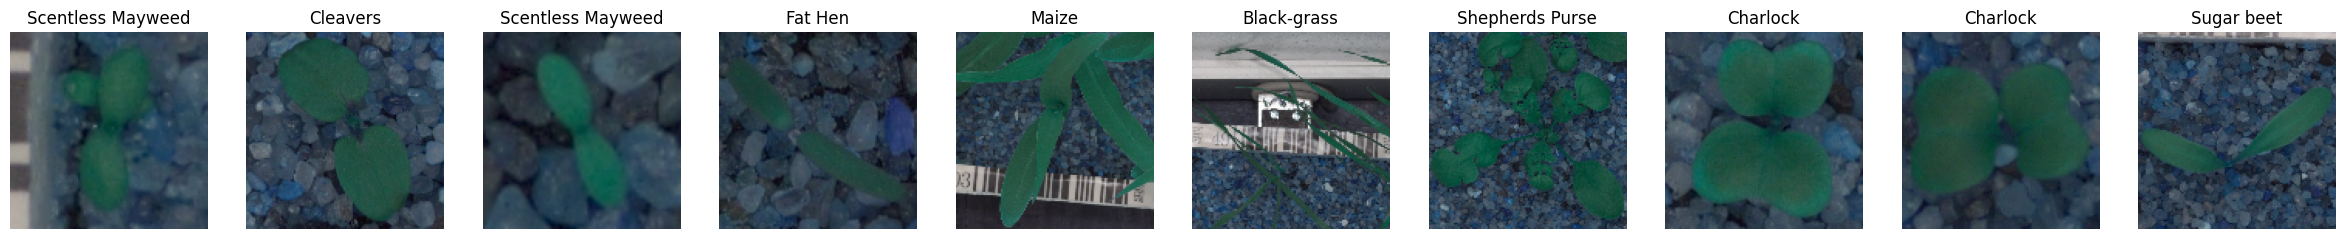

In [ ]:
visualize(10, x, y)

# **Section 2 : Data preprocessing [8 Marks]**
<hr>
<li>A. Create X & Y from the DataFrame. [2 Marks]
<li>B. Encode labels of the images. [2 Marks]
<li>C. Unify shape of all the images. [2 Marks]
<li>D. Normalise all the images. [2 Marks]
<hr>

<hr>

**<font color='green'>Create X & Y from the DataFrame</font>**

<hr>

In [ ]:
# x & y were already extracted above when reading from directory
x = np.array(x)
y = np.array(y)

In [ ]:
print(x.shape, y.shape)

(4750, 128, 128, 3) (4750,)


<hr>

**<font color='green'>Encode labels of the images</font>**

<hr>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
yenc = le.transform(y)

<hr>
<font color='green'>

**Unify shape of all the images**;
**Normalize labels of the images**
</font>
<hr>

In [ ]:
# Image shape was already unified when reading from directory
# All images are 128 X 128 X 3 as can be seen from shape command above [16]
xstd = x.astype('float32')
xstd = xstd/255.

# **Section 2 : Model training [10 Marks]**
<hr>
<font color='gray'>Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). <br>
If not, you need to correct it otherwise it will be issue during model training.</font>
<li>A. Split the data into train and test data. [2 Marks]
<li>B. Create new CNN architecture to train the model. [4 Marks]
<li>C. Train the model on train data and validate on test data. [2 Marks]
<li>D. Select a random image and print actual label and predicted label for the same. [2 Marks]
<hr>

<hr>

**<font color='green'>Split the data into train and test data.</font>**

<hr>

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xstd, yenc, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)
(3800,)
(950,)


<hr>

**<font color='green'>Create new CNN architecture to train the model.</font>**

<hr>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])

<hr>

**<font color='green'>Train the model on train data and validate on test data.</font>**

<hr>

In [ ]:
history = model.fit(xtrain, ytrain, epochs=20,
                    validation_data=(xtest, ytest), batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


119/119 [==============================] - 15s 31ms/step - loss: 2.4069 - accuracy: 0.1724 - val_loss: 2.3721 - val_accuracy: 0.2863
Epoch 2/20
119/119 [==============================] - 3s 23ms/step - loss: 2.0210 - accuracy: 0.3379 - val_loss: 1.8852 - val_accuracy: 0.3968
Epoch 3/20
119/119 [==============================] - 3s 24ms/step - loss: 1.6099 - accuracy: 0.4403 - val_loss: 1.6234 - val_accuracy: 0.4432
Epoch 4/20
119/119 [==============================] - 3s 23ms/step - loss: 1.4017 - accuracy: 0.5176 - val_loss: 1.4518 - val_accuracy: 0.5011
Epoch 5/20
119/119 [==============================] - 3s 24ms/step - loss: 1.2622 - accuracy: 0.5605 - val_loss: 1.3173 - val_accuracy: 0.5526
Epoch 6/20
119/119 [==============================] - 3s 24ms/step - loss: 1.1685 - accuracy: 0.5992 - val_loss: 1.2768 - val_accuracy: 0.5674
Epoch 7/20
119/119 [==============================] - 3s 24ms/step - loss: 1.0641 - accuracy: 0.6384 - val_loss: 1.1617 - val_accuracy: 0.6389
Epoch 8/2

Text(0.5, 1.0, 'Training and validation loss')

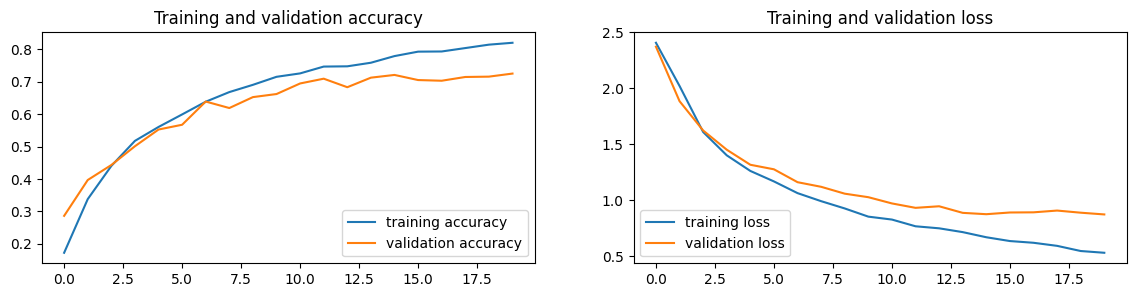

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy))
fig, ax = plt.subplots(1,2,figsize=(14,3))

ax[0].plot(epochs, accuracy, label = 'training accuracy')
ax[0].plot(epochs, val_accuracy, label = 'validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc = 'lower right')

ax[1].plot(epochs, loss, label = 'training loss')
ax[1].plot(epochs, val_loss, label = 'validation loss')
ax[1].legend(loc = 'lower left')
ax[1].set_title('Training and validation loss')

<hr>

**<font color='green'>Select a random image and print actual label and predicted label for the same. </font>**

<hr>

In [ ]:
ypredtrn = model.predict(xtrain)
ypredtst = model.predict(xtest)

30/30 [==============================] - 0s 6ms/step


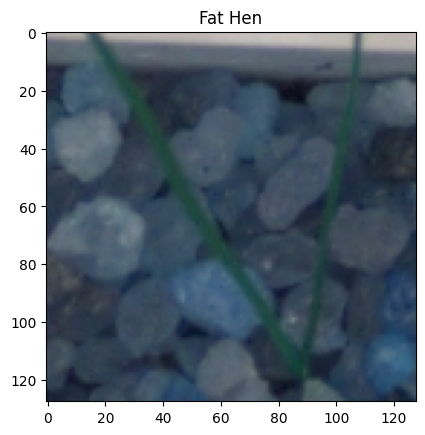

In [ ]:
n = 100
plt.title(labels[ytest[n]])
plt.imshow(xtest[n])
plt.show();

In [ ]:
print('Actual Label:', labels[ytest[n]])

Actual Label: Fat Hen


In [ ]:
# Convert the predicted probabilities to labels
for i,k in enumerate(ypredtst[n]):
    if k == ypredtst[n].max():
        print('Predicted_Label:', labels[i])

Predicted_Label: Fat Hen


## **Great Learning / Deakin (MDS) Project Submission**
<hr>

>**Computer Vision (CV) Project 2**<br>
>*Goal : Demonstrate the ability to build a image classifier*<br>
>*Domain : Botanical Research* <br>
>*Developer : Nishant Killedar*
<br>

> **CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.
<br>

> **PROJECT OBJECTIVE**: To experiment with various approaches to train an image classifier to predict type of flower from the image.

<hr>

# **Section 1 : Import and Understand the data [5 Marks]**
<hr>
<li>A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]<br>
<font color='gray'>Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.<br>
It can be loaded using: x, y = oxflower17.load_data()</font>
<li>B. Print Number of images and shape of the images. [1 Marks]
<li>C. Print count of each class from y. [2 Marks]
<hr>

In [ ]:
!pip uninstall tflearn

<hr>

**<font color='green'>Created a fork on tflearn as the current version of tensorflow is failing to import tflearn</font>**

<li>Reference : https://stackoverflow.com/questions/76866418/error-when-i-try-to-import-tflearn-cannot-import-name-is-sequence-from-tens

<hr>

In [ ]:
!pip install git+https://github.com/nishantkapps/tflearn.git

  Cloning https://github.com/nishantkapps/tflearn.git to /tmp/pip-req-build-mnxwmi4q
  Running command git clone --filter=blob:none --quiet https://github.com/nishantkapps/tflearn.git /tmp/pip-req-build-mnxwmi4q
  Resolved https://github.com/nishantkapps/tflearn.git to commit 1f055aa194ce142e274be20ff175cec54d42781c
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130659 sha256=c55986401ba05956a9ed6af03b484e90f8005bdbe95e8c9d4508440fb9b2676f
  Stored in directory: /tmp/pip-ephem-wheel-cache-3nca9me_/wheels/8b/6d/1a/75dbe7fc3f225e0dcac0e294aad1477e4aed13121833064697
Successfully built tflearn


In [ ]:
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
xf, yf = oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
print('Number of Images :',xf.shape[0])
print('Shape of Images  :',xf.shape[1],"X", xf.shape[2],"X", xf.shape[3])
print('Number of Labels :',yf.shape[0])

Number of Images : 1360
Shape of Images  : 224 X 224 X 3
Number of Labels : 1360


In [ ]:
print('Count of each class')
counts = pd.DataFrame(np.unique(yf, return_counts=True))
counts

Count of each class


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
1  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80

<hr>
<font color='green'>

**As can be seen from the table above, each class has 80 images** </font>
<hr>

# **Section 2 : Image Exploration & Transformation [10 Marks]**
<hr>
<li>A. Display 5 random images. [1 Marks]
<li>B. Select any image from the dataset and assign it to a variable. [1 Marks]
<li>C. Transform the image into grayscale format and display the same. [3 Marks]
<li>D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]
<li>E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]
<li>F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]
<hr>

In [ ]:
def visualize_images(n, x, y):
  rand = np.random.randint(0, len(x), n)
  plt.figure(figsize=(30, 20))
  for i,j in enumerate(rand):
      plt.subplot(1, len(rand), i+1)
      plt.imshow(x[j])  # greens, reds, blues, rgb
      plt.title("{}".format(y[j]))
      plt.axis('off')
  plt.show()

<hr>
<font color='green'>

**Display 5 random images.** </font>
<hr>

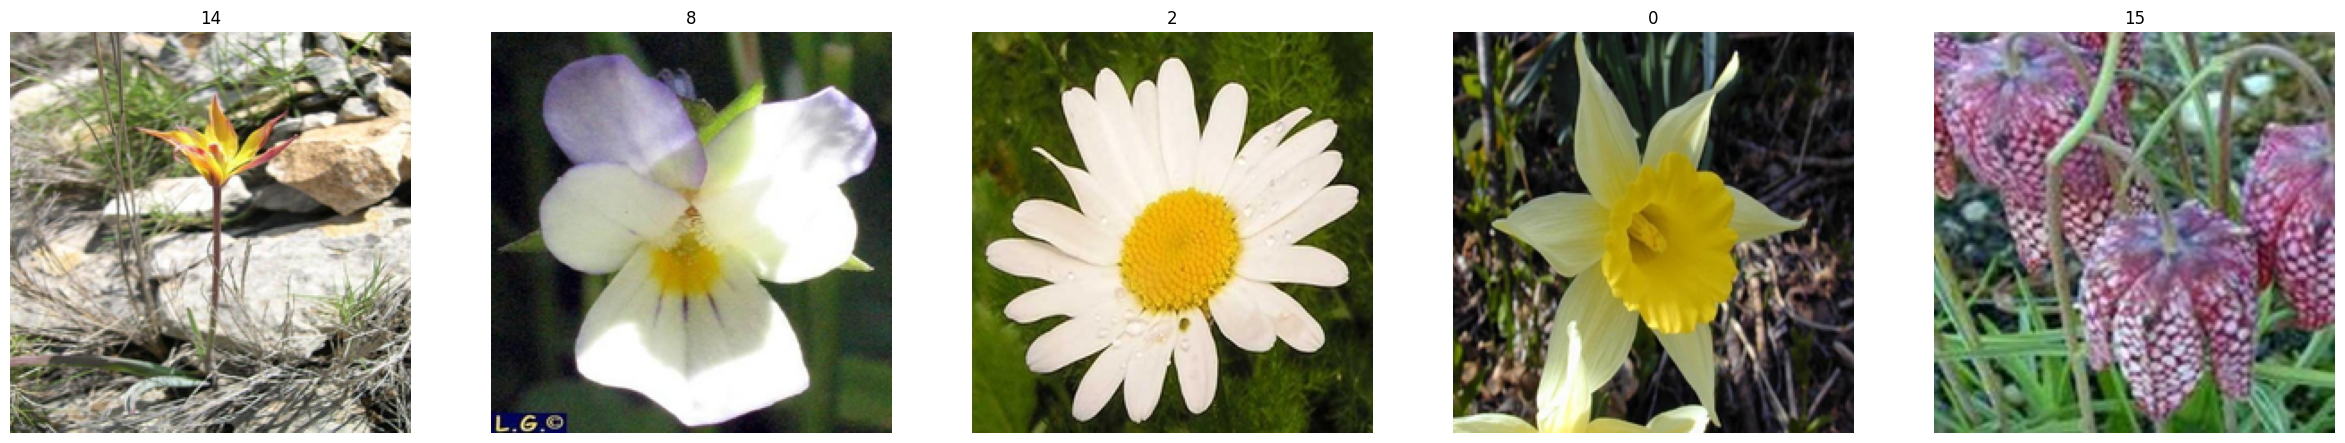

In [ ]:
visualize_images(5, xf, yf)

<hr>
<font color='green'>

**Select any image from the dataset and assign it to a variable.** </font>
<hr>

In [ ]:
img = xf[10]

<hr>
<font color='green'>

**Transform the image into grayscale format and display the same.** </font>
<hr>

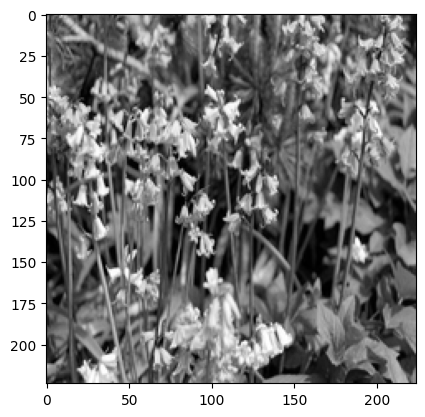

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

<hr>
<font color='green'>

**Apply a filter to sharpen the image and display the image before and after sharpening.** </font>
<hr>

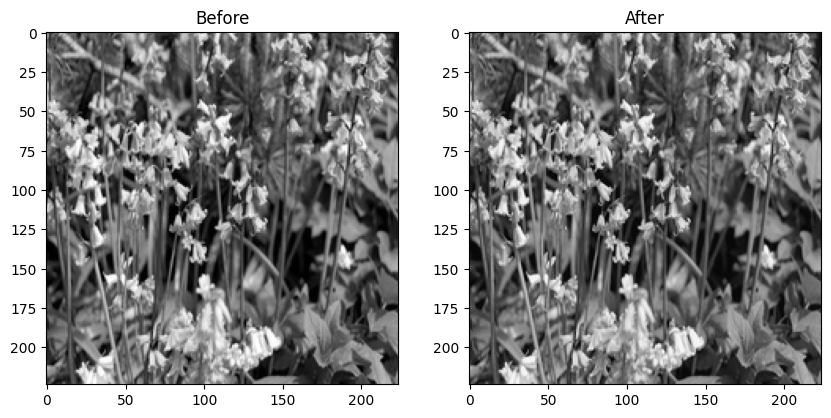

In [ ]:
kernel = np.array([[0, -1, 0],
[-1, 40, -1],
[0, -1, 0]])
sharpened = cv2.filter2D(gray_image, -1, kernel)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].set_title('Before')
ax[0].imshow(gray_image, cmap='gray')
ax[1].set_title('After')
ax[1].imshow(sharpened, cmap='gray')

<hr>
<font color='green'>

**Apply a filter to blur the image and display the image before and after blur.** </font>
<hr>

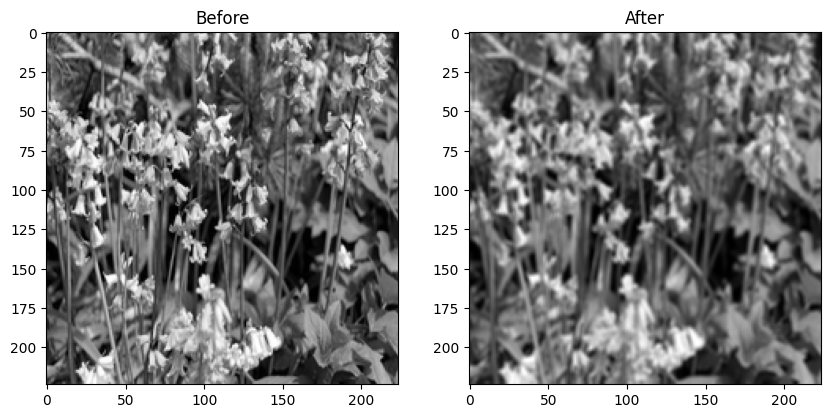

In [ ]:
blurred = cv2.GaussianBlur(gray_image, (3, 3), 10)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].set_title('Before')
ax[0].imshow(gray_image, cmap='gray')
ax[1].set_title('After')
ax[1].imshow(blurred, cmap='gray')

<hr>
<font color='green'>

**Display all the 4 images from above questions besides each other to observe the difference.** </font>
<hr>

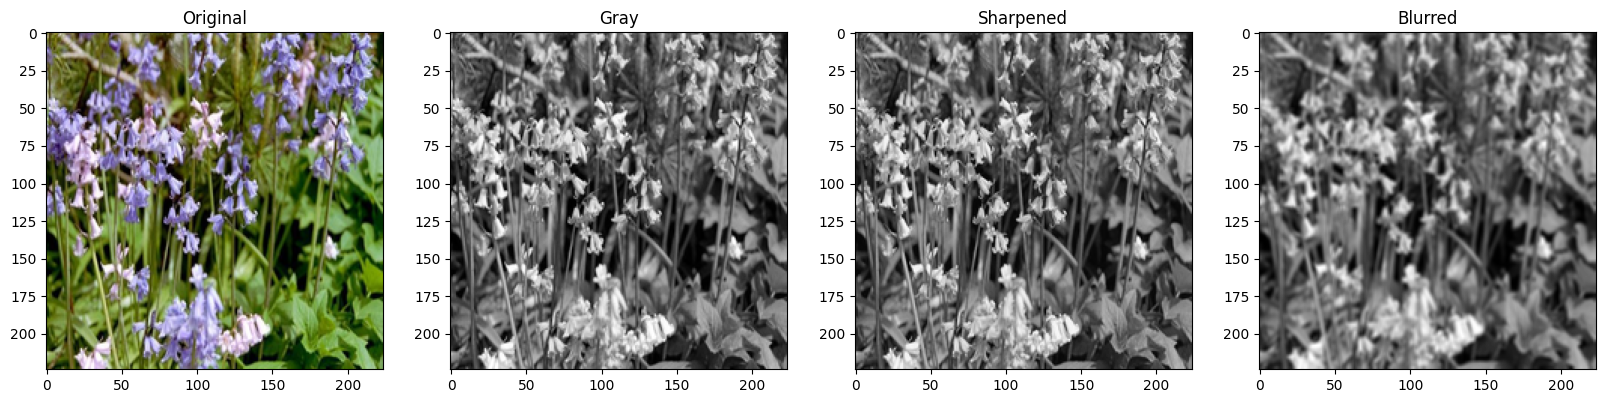

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].set_title('Original')
ax[0].imshow(img)
ax[1].set_title('Gray')
ax[1].imshow(gray_image, cmap='gray')
ax[2].set_title('Sharpened')
ax[2].imshow(sharpened, cmap='gray')
ax[3].set_title('Blurred')
ax[3].imshow(blurred, cmap='gray')

# **Section 3 : Model training and Tuning: [15 Marks]**
<hr>
<li>A. Split the data into train and test with 80:20 proportion. [2 Marks]
<li>B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]
<li>C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]
<li>D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]
<li>E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]
<hr>

<hr>
<font color='green'>

**Split the data into train and test with 80:20 proportion.** </font>
<hr>

In [ ]:
from sklearn.model_selection import train_test_split
xftrain, xftest, yftrain, yftest = train_test_split(xf, yf, test_size=0.2, random_state=42, stratify=yf)

In [ ]:
print(xftrain.shape)
print(xftest.shape)
print(yftrain.shape)
print(yftest.shape)

(1088, 224, 224, 3)
(272, 224, 224, 3)
(1088,)
(272,)


<hr>
<font color='green'>

**Train a model using any Supervised Learning algorithm and share performance metrics on test data.** </font>
<hr>

In [ ]:
# Flatten the images data
# Training data
xflttrn = []
for i in range(xftrain.shape[0]):
    xflttrn.append(xftrain[i,:].flatten())

# Testing data
xflttst = []
for i in range(xftest.shape[0]):
    xflttst.append(xftest[i,:].flatten())

# Print data lengths
print("Training data:",len(xflttrn))
print("Training Target data:",len(yftrain))
print("Testing data:",len(xflttst))
print("Testing Target data:",len(yftest))

Training data: 1088
Training Target data: 1088
Testing data: 272
Testing Target data: 272


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogR = LogisticRegression()
LogR.fit(xflttrn, yftrain)

ytrnpred=LogR.predict(xflttrn)
svc_Accuracy_Train = accuracy_score(y_true=yftrain, y_pred=ytrnpred)
print("Train Accuracy : ", svc_Accuracy_Train)

ytstpred = LogR.predict(xflttst)
svc_Accuracy_Test = accuracy_score(y_true=yftest, y_pred=ytstpred)
print("Test Accuracy : ", svc_Accuracy_Test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  1.0
Test Accuracy :  0.45955882352941174


<hr>
<font color='green'>

**Train a model using Neural Network and share performance metrics on test data.** </font>
<hr>

In [ ]:
### define model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
224*224*3

150528

In [ ]:
train_X = xftrain.reshape(xftrain.shape[0], 150528)
test_X = xftest.reshape(xftest.shape[0], 150528)

In [ ]:
print(train_X.shape, yftrain.shape)
print(test_X.shape, yftest.shape)

(1088, 150528) (1088,)
(272, 150528) (272,)


In [ ]:
from keras.utils import to_categorical
# one hot encode outputs
train_Y = to_categorical(yftrain)
test_Y = to_categorical(yftest)

# no.of classes
num_classes = train_Y.shape[1]
num_hidden = 10

print(num_classes)
print(train_Y.shape)
print(test_Y.shape)

17
(1088, 17)
(272, 17)


In [ ]:
# create model
modelnn = models.Sequential()
modelnn.add(layers.Dense(128, activation='relu',input_shape=(150528,)))
modelnn.add(layers.Dense(64, activation='relu'))
modelnn.add(layers.Dense(64, activation='relu'))
modelnn.add(layers.Dense(32, activation='relu'))
modelnn.add(layers.Dense(32, activation='relu'))
modelnn.add(layers.Dense(num_classes, activation='softmax'))
modelnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               19267712  
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 17)                561       
                                                                 
Total params: 19283825 (73.56 MB)
Trainable params: 19

In [ ]:
# Compile model
modelnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
history2 = modelnn.fit(train_X, yftrain, validation_data=(test_X, yftest), epochs=50, batch_size=32, verbose=2)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 - 1s - loss: 7.0051 - acc: 0.0800 - val_loss: 3.0395 - val_acc: 0.0846 - 1s/epoch - 1ms/sample
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 - 1s - loss: 2.8112 - acc: 0.1158 - val_loss: 2.8361 - val_acc: 0.1287 - 623ms/epoch - 572us/sample
Epoch 3/50
1088/1088 - 1s - loss: 2.7672 - acc: 0.1379 - val_loss: 2.6586 - val_acc: 0.1544 - 651ms/epoch - 599us/sample
Epoch 4/50
1088/1088 - 1s - loss: 2.6200 - acc: 0.1636 - val_loss: 2.5609 - val_acc: 0.1691 - 651ms/epoch - 599us/sample
Epoch 5/50
1088/1088 - 1s - loss: 2.4136 - acc: 0.2142 - val_loss: 2.4739 - val_acc: 0.2169 - 643ms/epoch - 591us/sample
Epoch 6/50
1088/1088 - 1s - loss: 2.2890 - acc: 0.2344 - val_loss: 2.2247 - val_acc: 0.2574 - 608ms/epoch - 559us/sample
Epoch 7/50
1088/1088 - 1s - loss: 2.1525 - acc: 0.2914 - val_loss: 2.1292 - val_acc: 0.2831 - 629ms/epoch - 578us/sample
Epoch 8/50
1088/1088 - 1s - loss: 1.8969 - acc: 0.3833 - val_loss: 2.0930 - val_acc: 0.2978 - 694ms/epoch - 638us/sample
Epoch 9/50
1088/1088 - 1s - loss: 1.7893 - acc: 0.4044 - val_loss: 2.0096 - val_acc: 0.3125 - 731ms/epoch - 671us/sample
Epoch 10/50
1088/1088 - 1s - loss: 1.6458 -

Text(0.5, 1.0, 'Training and validation loss')

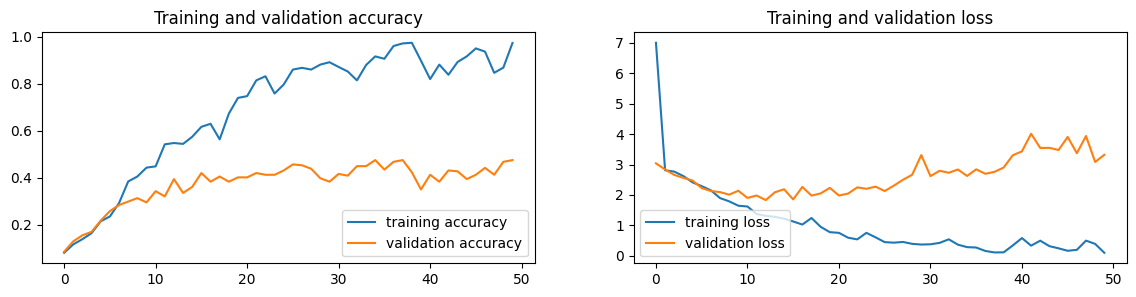

In [ ]:
accuracy = history2.history['acc']
val_accuracy = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs   = range(len(accuracy))
fig, ax = plt.subplots(1,2,figsize=(14,3))

ax[0].plot(epochs, accuracy, label = 'training accuracy')
ax[0].plot(epochs, val_accuracy, label = 'validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc = 'lower right')

ax[1].plot(epochs, loss, label = 'training loss')
ax[1].plot(epochs, val_loss, label = 'validation loss')
ax[1].legend(loc = 'lower left')
ax[1].set_title('Training and validation loss')

<hr>
<font color='green'>

**Train a model using a basic CNN and share performance metrics on test data.** </font>
<hr>

In [ ]:
modelcnn = models.Sequential()
modelcnn.add(Conv2D(32, (3,3), padding='same', input_shape=(224, 224, 3), activation='relu', kernel_initializer='he_normal', name='conv_1'))
modelcnn.add(Conv2D(32, (3,3), activation='relu', name='conv_2'))
modelcnn.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
modelcnn.add(Dropout(0.25))

modelcnn.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal', name='conv_3'))
modelcnn.add(Conv2D(64, (3,3), activation='relu', name='conv_4'))
modelcnn.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
modelcnn.add(Dropout(0.25))

modelcnn.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal', name='conv_5'))
modelcnn.add(Conv2D(128, (3,3), activation='relu', name='conv_6'))
#modelcnn.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))

modelcnn.add(Flatten())
modelcnn.add(Dense(256, activation='relu', name='dense_1'))
modelcnn.add(Dropout(0.2))
modelcnn.add(Dense(128, activation='relu', name='dense_2'))
modelcnn.add(Dense(17, activation='softmax', name='output'))

modelcnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv_2 (Conv2D)             (None, 222, 222, 32)      9248      
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 111, 111, 32)      0         
                                                                 
 dropout_6 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv_3 (Conv2D)             (None, 111, 111, 64)      18496     
                                                                 
 conv_4 (Conv2D)             (None, 109, 109, 64)      36928     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 54, 54, 64)       

In [ ]:
# modelcnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelcnn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_acc',
    patience=8,
    min_delta=0.001,
    mode='max'
)

<hr>

**<font color='green'>Train the model on train data and validate on test data.</font>**

<hr>

In [ ]:
#historycnn = modelcnn.fit(xftrain, yftrain, epochs=20, validation_split=0.25
#                    validation_data=(xftest, yftest), batch_size=32, callbacks=[custom_early_stopping])
historycnn = modelcnn.fit(xftrain, yftrain, epochs=20, validation_split=0.25,
                              batch_size=32, callbacks=[custom_early_stopping])

Train on 816 samples, validate on 272 samples
Epoch 1/20
816/816 [==============================] - 11s 14ms/sample - loss: 11.7077 - acc: 0.0760 - val_loss: 2.8295 - val_acc: 0.0404
Epoch 2/20
816/816 [==============================] - 5s 7ms/sample - loss: 2.7747 - acc: 0.1287 - val_loss: 2.6447 - val_acc: 0.1691
Epoch 3/20
816/816 [==============================] - 5s 7ms/sample - loss: 2.6598 - acc: 0.1936 - val_loss: 2.2913 - val_acc: 0.2831
Epoch 4/20
816/816 [==============================] - 5s 7ms/sample - loss: 2.3369 - acc: 0.2549 - val_loss: 2.5396 - val_acc: 0.1434
Epoch 5/20
816/816 [==============================] - 5s 7ms/sample - loss: 2.1651 - acc: 0.3113 - val_loss: 2.1146 - val_acc: 0.2757
Epoch 6/20
816/816 [==============================] - 6s 7ms/sample - loss: 1.8374 - acc: 0.3885 - val_loss: 2.4494 - val_acc: 0.3051
Epoch 7/20
816/816 [==============================] - 6s 7ms/sample - loss: 1.6601 - acc: 0.4571 - val_loss: 2.0975 - val_acc: 0.3382
Epoch 8/20
81

Text(0.5, 1.0, 'Training and validation loss')

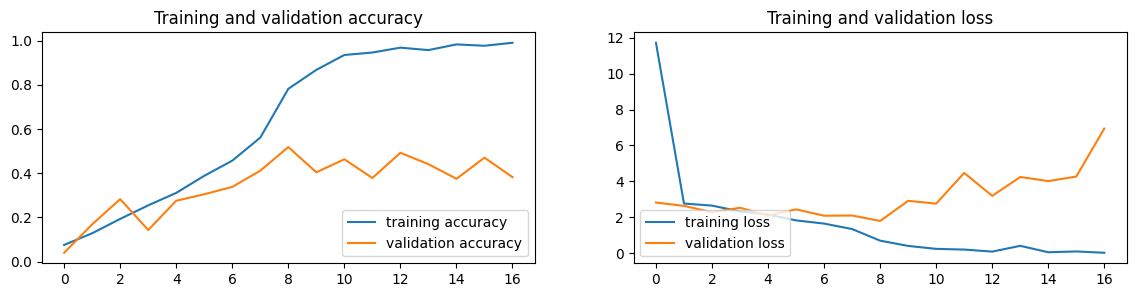

In [ ]:
accuracy = historycnn.history['acc']
val_accuracy = historycnn.history['val_acc']
loss = historycnn.history['loss']
val_loss = historycnn.history['val_loss']

epochs   = range(len(accuracy))
fig, ax = plt.subplots(1,2,figsize=(14,3))

ax[0].plot(epochs, accuracy, label = 'training accuracy')
ax[0].plot(epochs, val_accuracy, label = 'validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc = 'lower right')

ax[1].plot(epochs, loss, label = 'training loss')
ax[1].plot(epochs, val_loss, label = 'validation loss')
ax[1].legend(loc = 'lower left')
ax[1].set_title('Training and validation loss')

<hr>

**<font color='green'>Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.</font>**

<hr>

In [ ]:
def predictnn(model, path):
  img = cv2.imread('/content/drive/MyDrive/datasets/glcv/addl/Prediction-1.jpg')
  img = img.reshape((150528,))
  pred = np.argmax(model.predict(np.array([img])), axis=-1)[0]
  return pred

In [ ]:
def predictcnn(model, path):
  img = cv2.imread('/content/drive/MyDrive/datasets/glcv/addl/Prediction-1.jpg')
  pred = np.argmax(model.predict(np.array([img])), axis=-1)[0]
  return pred

In [ ]:
def predictclf(model, path):
  img = cv2.imread('/content/drive/MyDrive/datasets/glcv/addl/Prediction-1.jpg')
  img = img.reshape((150528,))
  pred = model.predict(np.array([img]))[0]
  return pred

In [ ]:
imagepath = '/content/drive/MyDrive/datasets/glcv/addl/Prediction-1.jpg'
predlr = predictclf(LogR, imagepath)
prednn = predictnn(modelnn, imagepath)
predcnn = predictcnn(modelcnn, imagepath)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print('Logistic Regression: ', predlr)
print('Neural Network: ', prednn)
print('Convolutional NN: ', predcnn)

Logistic Regression:  7
Neural Network:  1
Convolutional NN:  1


In [ ]:
imagepath = '/content/drive/MyDrive/datasets/glcv/addl/Prediction-1.jpg'
predcnn = predictcnn(modelcnn, imagepath)
print('Convolutional NN: ', predcnn)

Convolutional NN:  1


In [ ]:
%%shell
jupyter nbconvert --to html '/content/Image_Classification_Project.ipynb'

[NbConvertApp] Converting notebook /content/Image_Classification_Project.ipynb to html
[NbConvertApp] Writing 5635115 bytes to /content/Image_Classification_Project.html
